MAcchina a vettori di supporto (SVM)

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

iris = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", names=["sepal length","sepal width","petal length","petal width","class"])
iris.info()
iris.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [18]:
X = iris.drop("class", axis=1).values           #proprietà
Y = iris["class"].values                        #target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [20]:
#eseguo l'encoding sulle etichette della colonna classe -> target: Y
le = LabelEncoder()
Y_train = le.fit_transform(Y_train)
Y_test = le.transform(Y_test)

#standardizzo il dataset tutte le colonne tranne il target: X
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [23]:
#prendo un subset contenente solo le prime due proprietà
X2_train = X_train[:, :2]
X2_test = X_test[:, :2]

#addestro il modello SVC con queste due proprietà
from sklearn.svm import LinearSVC
svc = LinearSVC()
svc.fit(X2_train, Y_train)
print("ACCURACY sul subset (2 proprietà): TRAIN= %.4f TEST= %.4f" %(svc.score(X2_train, Y_train), svc.score(X2_test, Y_test)))  #OVERFITTING

ACCURACY il subset (2 proprietà): TRAIN= 0.8286 TEST= 0.6889


Visualizzo il decision boundary

In [24]:
def plot_bounds(X,Y,model=None,classes=None, figsize=(8,6)):
        
    plt.figure(figsize=figsize)
        
    if(model):
        X_train, X_test = X
        Y_train, Y_test = Y
        X = np.vstack([X_train, X_test])
        x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
        y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

        xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),
                             np.arange(y_min, y_max, .02))

        if hasattr(model, "predict_proba"):
            Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        else:
            Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
            
        Z = Z.reshape(xx.shape)

        plt.contourf(xx, yy, Z, alpha=.8)

    plt.scatter(X_train[:,0], X_train[:,1], c=Y_train)
    plt.scatter(X_test[:,0], X_test[:,1], c=Y_test, alpha=0.6)
    
    plt.show()

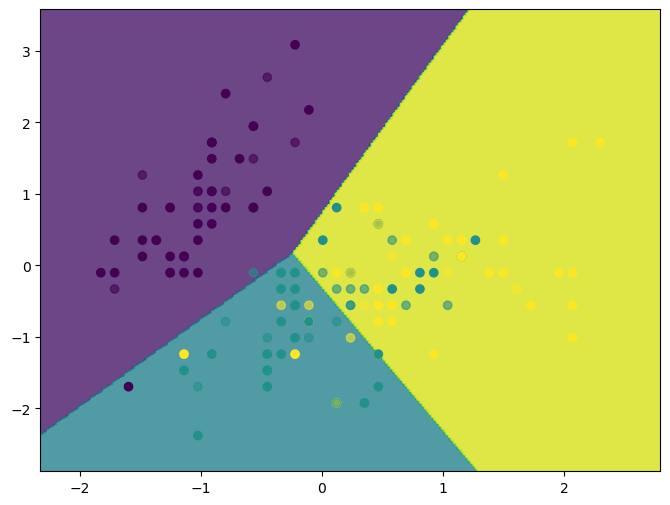

In [25]:
plot_bounds((X2_train, X2_test) , (Y_train, Y_test), svc)

In [30]:
#riaddestro il modello su tutte le proprietà
svc.fit(X_train, Y_train)
print("ACCURACY su tutte le proprietà: TRAIN= %.4f TEST= %.4f" %(svc.score(X_train, Y_train), svc.score(X_test, Y_test)))   #OTTIMO

ACCURACY su tutte le proprietà: TRAIN= 0.9429 TEST= 0.9556
